In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2
import sys
sys.path.insert(0, '../src')
from load_data import download_openml_dataset
from preprocess import rename_columns, convert_gender_to_numeric, remove_outliers_z_score

DATASET_ID = 1480

In [64]:
df = download_openml_dataset(DATASET_ID)


d:\OneDrive - Murex\Desktop\ass1ml\notebooks\../src\load_data.py:13: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  dataset = openml.datasets.get_dataset(dataset_id, download_data=True)


In [65]:
new_column_names = [
    "Age", "Gender", "Total_Bilirubin", "Direct_Bilirubin", 
    "Alkaline_Phosphatase", "Alanine_Aminotransferase", 
    "Aspartate_Aminotransferase", "Total_Proteins", "Albumin", 
    "Albumin_and_Globulin_Ratio", "Class"
]
df = rename_columns(df,new_column_names)

In [66]:
print(df.head())

   Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphatase  \
0   65  Female              0.7               0.1                 187.0   
1   62    Male             10.9               5.5                 699.0   
2   62    Male              7.3               4.1                 490.0   
3   58    Male              1.0               0.4                 182.0   
4   72    Male              3.9               2.0                 195.0   

   Alanine_Aminotransferase  Aspartate_Aminotransferase  Total_Proteins  \
0                      16.0                        18.0             6.8   
1                      64.0                       100.0             7.5   
2                      60.0                        68.0             7.0   
3                      14.0                        20.0             6.8   
4                      27.0                        59.0             7.3   

   Albumin  Albumin_and_Globulin_Ratio Class  
0      3.3                        0.90     1  
1   

In [67]:
df.fillna(df.mean(), inplace=True)
df = convert_gender_to_numeric(df)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Age                         583 non-null    uint8   
 1   Gender                      583 non-null    category
 2   Total_Bilirubin             583 non-null    float64 
 3   Direct_Bilirubin            583 non-null    float64 
 4   Alkaline_Phosphatase        583 non-null    float64 
 5   Alanine_Aminotransferase    583 non-null    float64 
 6   Aspartate_Aminotransferase  583 non-null    float64 
 7   Total_Proteins              583 non-null    float64 
 8   Albumin                     583 non-null    float64 
 9   Albumin_and_Globulin_Ratio  583 non-null    float64 
 10  Class                       583 non-null    category
dtypes: category(2), float64(8), uint8(1)
memory usage: 38.5 KB


In [68]:
df = remove_outliers_z_score(df)


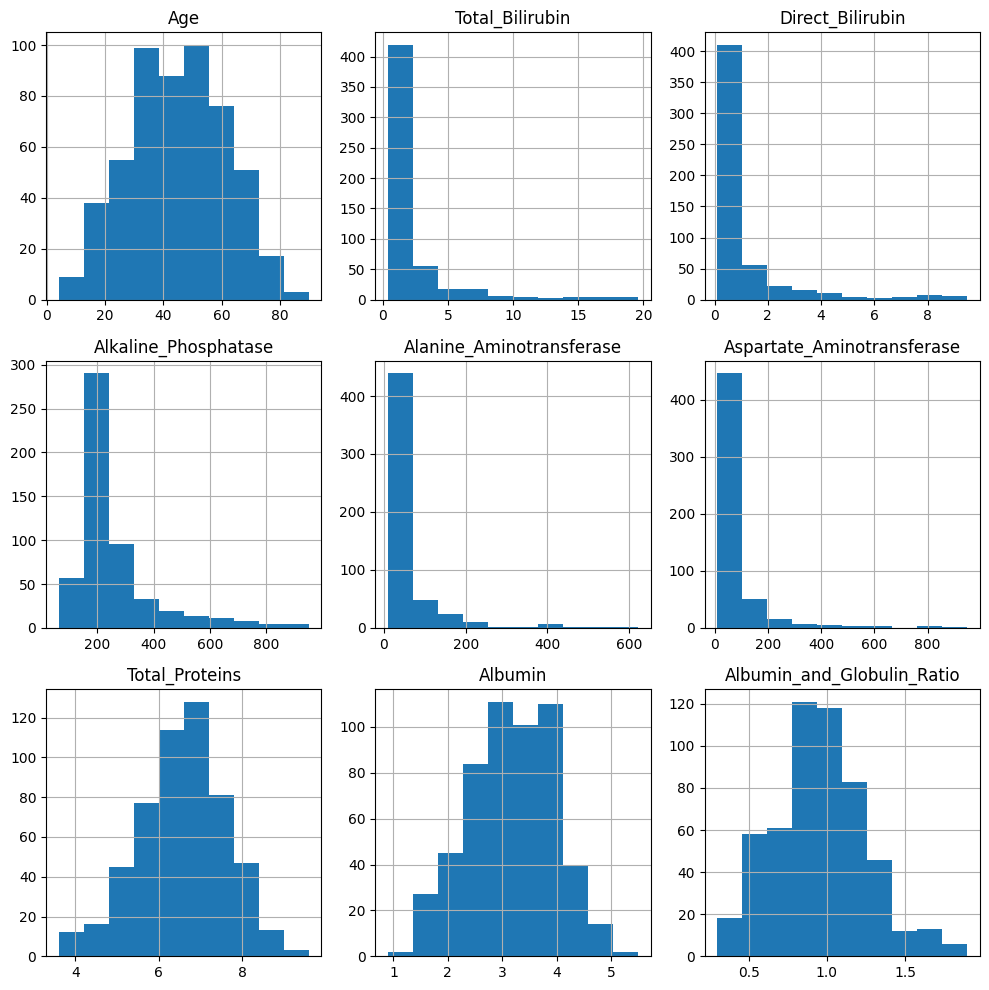

In [69]:
df.hist(figsize=(10, 10))
plt.tight_layout()  
plt.show()


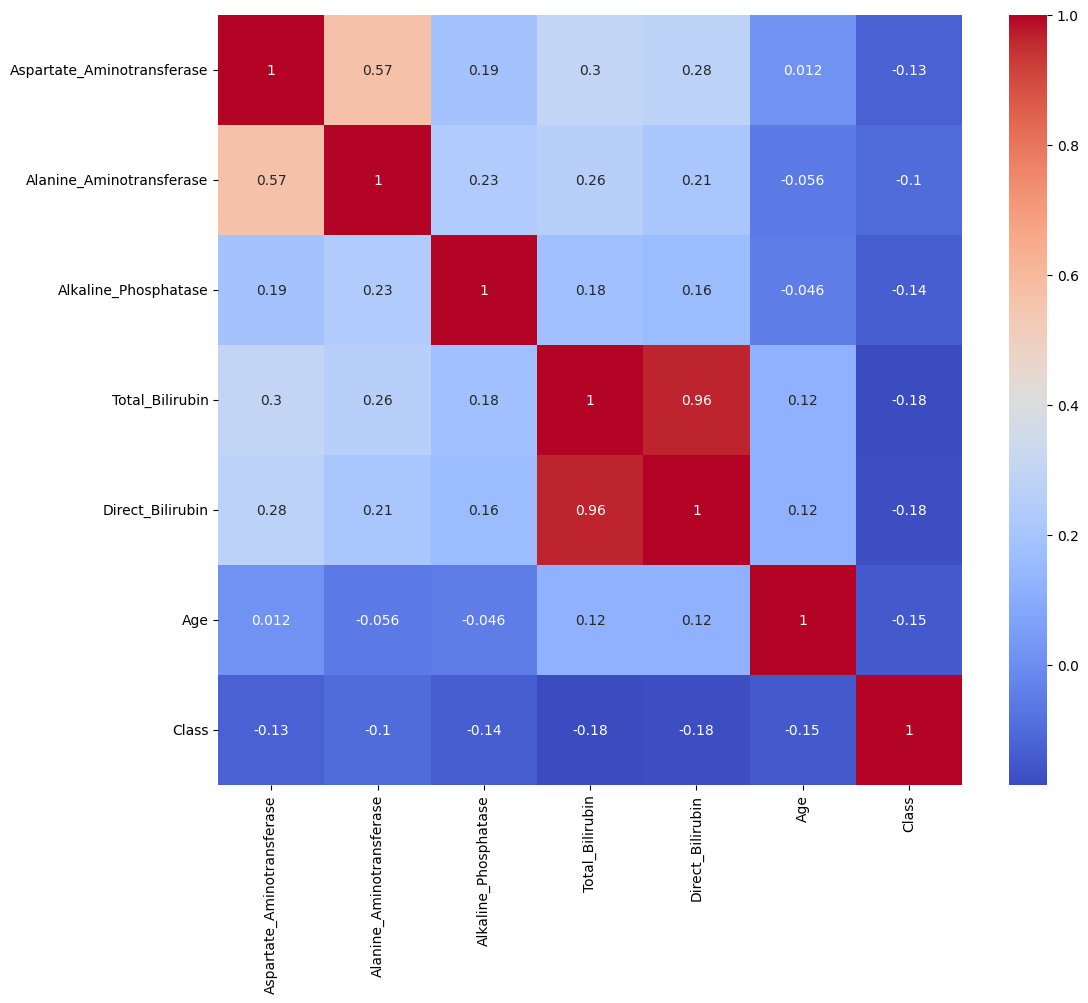

In [58]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [54]:
X = df.drop('Class', axis=1)  
y = df['Class'] 

selector = SelectKBest(score_func=chi2, k='all')
selector.fit(X, y)

feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector.scores_
}).sort_values(by='Score', ascending=False)

print(feature_scores)

                      Feature       Score
0  Aspartate_Aminotransferase  318.747072
2        Alkaline_Phosphatase  312.305324
1    Alanine_Aminotransferase  230.759835
5                         Age   55.836413
3             Total_Bilirubin   14.289259
4            Direct_Bilirubin   12.252643


In [47]:
processed_data = df[['Aspartate_Aminotransferase', 'Alanine_Aminotransferase', 'Alkaline_Phosphatase', 'Total_Bilirubin', 'Direct_Bilirubin', 'Age']]
y = df['Class']

df = pd.concat([processed_data, y], axis=1)

df.to_csv('../data/liver_disease_preprocessed.csv', index=False)